# CLASSIFYING IMAGES ON CIFAR10 DATASET USING CNN

In [13]:
from keras.datasets import cifar10
from scipy.misc import toimage
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import keras.backend as K
K.set_image_dim_ordering('tf')
weight_decay=0.01

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
print("The no of training images are", x_train.shape[0])
print("The no of test images are", x_test.shape[0])
print("The classes which an image belong to ",np.unique(y_train))
print("The no of classes are ",np.count_nonzero(np.unique(y_train))+1)

The no of training images are 50000
The no of test images are 10000
The classes which an image belong to  [0 1 2 3 4 5 6 7 8 9]
The no of classes are  10


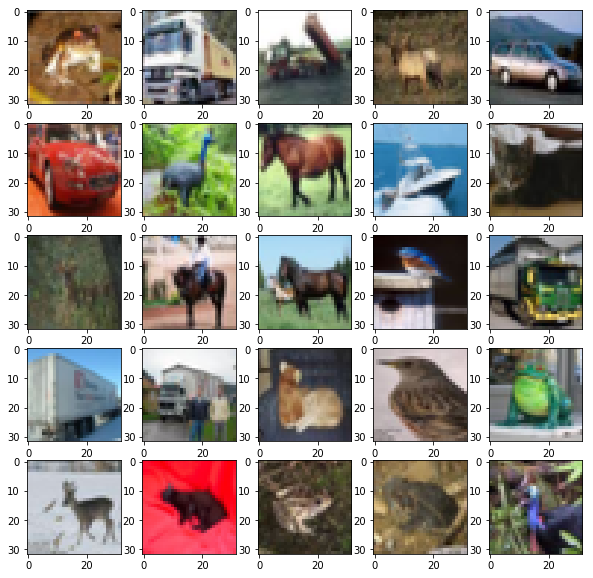

In [16]:
#displaying top 25 training images
columns = 5
rows = 5
fig, ax_array = plt.subplots(rows, columns,squeeze=False,figsize=(10,10))
k=0
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        img=toimage(x_train[k])
        axes.imshow(img)
        k=k+1
plt.show()

In [17]:
#converting each class to one hot encoding as we use loss as categorical cross entropy
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [18]:
#Normalizing the values between 0 to 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
#adding data augmentation to avoid overfitting
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( zoom_range=0.2, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True, 
        vertical_flip=False)  

In [20]:
 from keras.models import Sequential
 from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 from keras import initializers
 from keras.layers.normalization import BatchNormalization
 model = Sequential()
 #first convolution layer   
 model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=keras.regularizers.l2(weight_decay), 
                  input_shape=(32,32,3)))
 #second convolution layer   
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=keras.regularizers.l2(weight_decay)))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(BatchNormalization())
 model.add(Dropout(0.25))
 #third convolution layer  
 model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer=initializers.he_normal(), kernel_regularizer=keras.regularizers.l2(weight_decay)))
 #fourth convolution layer
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=keras.regularizers.l2(weight_decay)))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(BatchNormalization()) 
 model.add(Dropout(0.25))
 #fifth convolution layer  
 model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=keras.regularizers.l2(weight_decay)))
 #sixth convolution layer     
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=keras.regularizers.l2(weight_decay)))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(BatchNormalization())
 model.add(Dropout(0.25))
 #softmax layer  
 model.add(Flatten())
 model.add(Dense(1024, activation='relu',kernel_initializer=initializers.he_normal(),kernel_regularizer=keras.regularizers.l2(weight_decay)))
 model.add(Dropout(0.5))
 model.add(Dense(10, activation='softmax',kernel_initializer=initializers.glorot_normal()))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
__________

In [23]:
batch_size = 250
epochs = 25

In [24]:
history =model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                              epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/25
200/200 [==============================] - 478s 2s/step - loss: 15.5332 - acc: 0.3374 - val_loss: 6.5793 - val_acc: 0.3152
Epoch 2/25
200/200 [==============================] - 463s 2s/step - loss: 4.1175 - acc: 0.4789 - val_loss: 3.3109 - val_acc: 0.3663
Epoch 3/25
200/200 [==============================] - 463s 2s/step - loss: 2.4066 - acc: 0.5514 - val_loss: 3.1078 - val_acc: 0.3047
Epoch 4/25
200/200 [==============================] - 463s 2s/step - loss: 1.9471 - acc: 0.5938 - val_loss: 2.1023 - val_acc: 0.5514
Epoch 5/25
200/200 [==============================] - 460s 2s/step - loss: 1.7396 - acc: 0.6249 - val_loss: 1.7507 - val_acc: 0.6152
Epoch 6/25
200/200 [==============================] - 464s 2s/step - loss: 1.6409 - acc: 0.6453 - val_loss: 1.5797 - val_acc: 0.6571
Epoch 7/25
200/200 [==============================] - 465s 2s/step - loss: 1.5655 - acc: 0.6604 - val_loss: 1.5282 - val_acc: 0.6772
Epoch 8/25
200/200 [==============================] - 459s 2s/step -

In [28]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

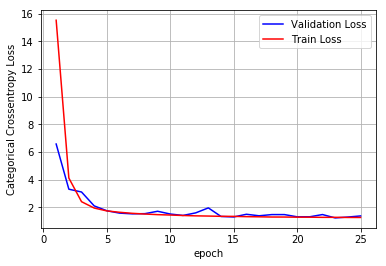

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.37684882946
Test accuracy: 0.6803
